<a href="https://colab.research.google.com/github/Siddhu290/SSPU_Machine_Learning/blob/main/2024-06-29/3_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df=pd.read_csv('https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv')

In [69]:
df

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,Zimbabwe,Africa,2004,Developing,44.3,723,27,4.36,0.000000,68.0,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,Zimbabwe,Africa,2003,Developing,44.5,715,26,4.06,0.000000,7.0,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,Zimbabwe,Africa,2002,Developing,44.8,73,25,4.43,0.000000,73.0,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,Zimbabwe,Africa,2001,Developing,45.3,686,25,1.72,0.000000,76.0,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


In [70]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,1997.000000,2461.000000,2461.000000,2461.000000,2453.000000,2309.000000,2461.000000,2461.000000,2461.000000,2461.000000,2458.000000,2458.000000
mean,2007.485169,69.464567,160.961804,31.134498,4.328952,880.115968,80.849775,2361.811865,38.346404,43.204388,82.682022,5.874010,1.893661,7555.989842,4.841040,4.883909,0.633627,12.157933
std,4.601993,9.639385,126.167514,127.249666,4.056351,2143.267664,24.975829,11148.748920,19.908022,172.992761,23.147657,2.395258,5.464583,14337.844932,4.500021,4.592501,0.212276,3.326975
min,2000.000000,36.300000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.400000,69.000000,0.000000,0.510000,24.733286,77.000000,0.000000,19.200000,0.000000,78.000000,4.230000,0.100000,462.486524,1.600000,1.600000,0.494250,10.200000
50%,2007.000000,72.300000,137.000000,2.000000,3.480000,122.936535,92.000000,15.000000,43.800000,3.000000,93.000000,5.760000,0.100000,1792.384500,3.300000,3.300000,0.686000,12.450000
75%,2011.000000,76.000000,223.000000,19.000000,7.380000,579.738437,96.000000,341.000000,56.100000,24.000000,97.000000,7.530000,0.800000,6171.262444,7.100000,7.100000,0.788000,14.500000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


In [71]:
df.replace({"Developing":0,"Developed":1},inplace=True)


In [72]:
df

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,0,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,0,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,0,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,0,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,0,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,Zimbabwe,Africa,2004,0,44.3,723,27,4.36,0.000000,68.0,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,Zimbabwe,Africa,2003,0,44.5,715,26,4.06,0.000000,7.0,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,Zimbabwe,Africa,2002,0,44.8,73,25,4.43,0.000000,73.0,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,Zimbabwe,Africa,2001,0,45.3,686,25,1.72,0.000000,76.0,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


In [73]:
x=df[["infant_deaths"]]

In [74]:
y=df[["Status"]]

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [76]:
model=LogisticRegression()

In [77]:
model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [78]:
model.intercept_

array([-0.42728838])

In [79]:
model.coef_

array([[-0.48290375]])

In [80]:
model.predict_proba(x)

array([[1.00000000e+00, 6.48096963e-14],
       [1.00000000e+00, 2.46714750e-14],
       [1.00000000e+00, 9.39183043e-15],
       ...,
       [9.99996273e-01, 3.72707813e-06],
       [9.99996273e-01, 3.72707813e-06],
       [9.99993959e-01, 6.04073699e-06]])

In [81]:
model.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
confusion_matrix(y, model.predict(x))

array([[2013,    0],
       [ 448,    0]])

In [83]:
accuracy_score(y, model.predict(x))

0.8179601787891101

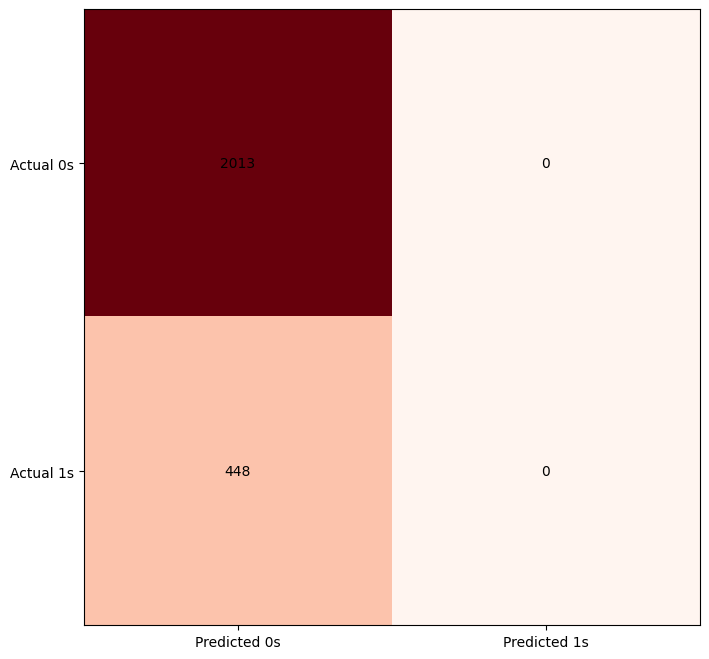

In [84]:
cm= confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='Reds')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()

In [85]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2013
           1       0.00      0.00      0.00       448

    accuracy                           0.82      2461
   macro avg       0.41      0.50      0.45      2461
weighted avg       0.67      0.82      0.74      2461



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
df.isna().sum()

Country                              0
Continent                            0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        464
Measles                              0
 BMI                                 0
under_five_deaths                    0
Polio                                8
Total_expenditure                  152
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income_composition_of_resources      3
Schooling                            3
dtype: int64

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
sim=SimpleImputer(strategy="mean")

In [91]:
df[["Total_expenditure"]]=sim.fit_transform(df[["Total_expenditure"]])

In [92]:
df.isna().sum()

Country                              0
Continent                            0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        464
Measles                              0
 BMI                                 0
under_five_deaths                    0
Polio                                8
Total_expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income_composition_of_resources      3
Schooling                            3
dtype: int64

In [94]:
x1=df[["Total_expenditure"]]

In [95]:
model1=LogisticRegression()

In [96]:
model1.fit(x1,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [97]:
model1.intercept_

array([-3.41598543])

In [98]:
model1.coef_

array([[0.30091241]])

In [99]:
model1.predict_proba(x1)

array([[0.72322994, 0.27677006],
       [0.72202366, 0.27797634],
       [0.72503329, 0.27496671],
       ...,
       [0.8101565 , 0.1898435 ],
       [0.82669245, 0.17330755],
       [0.7823659 , 0.2176341 ]])

In [100]:
model1.predict(x1)

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
confusion_matrix(y, model1.predict(x1))

array([[1984,   29],
       [ 435,   13]])

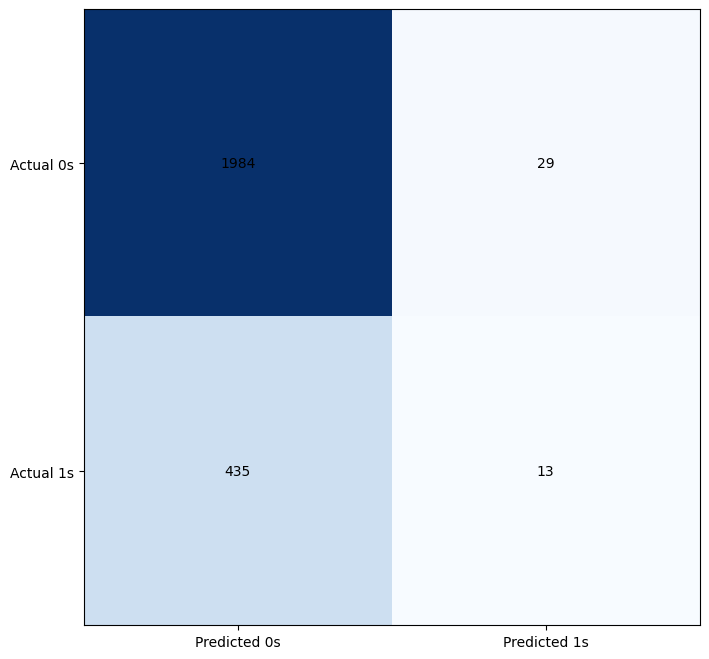

In [103]:
cm= confusion_matrix(y, model1.predict(x1))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()